In [1]:
import netCDF4 as nc
import datetime as dt
import subprocess
import requests
import matplotlib.pyplot as plt
import cmocean
import numpy as np
import os
import glob
import dateutil as dutil
from salishsea_tools import viz_tools, places
%matplotlib inline

In [2]:
jS3,iS3=places.PLACES['S3']['NEMO grid ji']

In [3]:
places.PLACES['Juan de Fuca Strait']

{'lon lat': (-124.7, 48.47)}

In [4]:
jJF,iJF=[290,130]

In [5]:
places.PLACES['Puget Sound']

{'lon lat': (-122.67, 48)}

In [6]:
jPS,iPS=[107,254]

In [38]:
jBS, iBS=places.PLACES['Baynes Sound']['NEMO grid ji']

In [49]:
jGI,iGI=[390,240]

In [79]:
jNSoG,iNSoG=[638,197]

In [80]:
with nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/mesh_mask201702_noLPE.nc') as fm:
    tmask=np.copy(fm.variables['tmask'])
    umask=np.copy(fm.variables['umask'])
    vmask=np.copy(fm.variables['vmask'])
    navlon=np.copy(fm.variables['nav_lon'])
    navlat=np.copy(fm.variables['nav_lat'])
    dept=np.copy(fm.variables['gdept_1d'])
    e3t_0=np.copy(fm.variables['e3t_0'])
    e3u_0=np.copy(fm.variables['e3u_0'])
    e3v_0=np.copy(fm.variables['e3v_0'])
    e1t=np.copy(fm.variables['e1t'])
    e2t=np.copy(fm.variables['e2t'])
    e1v=np.copy(fm.variables['e1v'])
    e2u=np.copy(fm.variables['e2u'])
    A=fm.variables['e1t'][0,:,:]*fm.variables['e2t'][0,:,:]*tmask[0,0,:,:]

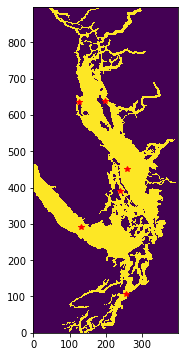

In [81]:
fig,ax=plt.subplots(1,1,figsize=(4,6))
ax.pcolormesh(tmask[0,0,:,:])
ax.plot(130,290,'r*')
ax.plot(iS3,jS3,'r*')
ax.plot(254,107,'r*')
ax.plot(iBS,jBS,'r*')
ax.plot(iGI,jGI,'r*')
ax.plot(iNSoG,jNSoG,'r*')
ax.set_aspect(1)

In [82]:
jpk40=0
for i in range(0,40):
    if dept[0][i]<=40:
        jpk40=i
print(jpk40)
jpk40=jpk40+1
print(jpk40)

22
23


In [83]:
koff=jpk40 # first index of depth > 40

In [84]:
t0=dt.datetime(2015,1,1) # 1st start date of run
#te=dt.datetime(2016,12,1)# last start date of runfnum=18
stm=np.shape(tmask)
#nlen=36*2
nlen=365
dlist=[t0+dt.timedelta(days=ii) for ii in range(0,nlen)]

In [85]:
#sdir0='/results/SalishSea/nowcast-green/'
#sdir1='/results/SalishSea/hindcast/'
#sdir3='/data/eolson/MEOPAR/SS36runs/CedarRuns/spring2015_HCMZ/'
#sdir1='/results2/SalishSea/nowcast-green.201905/'
sdir1='/results2/SalishSea/nowcast-green.201905/'

In [86]:
tmaskC=np.copy(tmask)
tmaskC[:,koff:,:,:]=0
#tmaskC[:,:,370:490,:12]=0
#tmaskC[:,:,887:,30:70]=0

In [88]:
tlist=dlist
idir=sdir1
fformat1='%d%b%y/'
fformatT='SalishSea_1d_%Y%m%d_%Y%m%d_dia2_T.nc'
fformatP='SalishSea_1h_%Y%m%d_%Y%m%d_carp_T.nc'
meanMESZD40=np.zeros((len(tlist),))
meanMESZD40S3=np.zeros((len(tlist),))
meanMESZD40JF=np.zeros((len(tlist),))
meanMESZD40PS=np.zeros((len(tlist),))
meanMESZD40BS=np.zeros((len(tlist),))
meanMESZD40GI=np.zeros((len(tlist),))
meanMESZD40NSoG=np.zeros((len(tlist),))
ind=-1
for idt0 in tlist:
    ind=ind+1
    cdir=idt0.strftime(fformat1).lower()
    iffT=idt0.strftime(fformatT)
    iffP=idt0.strftime(fformatP)
    sffT=idir+cdir+iffT
    sffP=idir+cdir+iffP
    f=nc.Dataset(glob.glob(sffT)[0])
    if ind%15==0: print(sffT) 
    fP=nc.Dataset(glob.glob(sffP)[0])
    #e3t=fP.variables['e3t'][:2,:,:,:]
    Vol=A*e3t_0
    meanMESZD40[ind]=np.sum(tmaskC[0,:,:,:]*Vol[0,:,:,:]*f.variables['GRMESZDIAT'][0,:,:,:])/\
            np.sum(tmaskC[0,:,:,:]*Vol[0,:,:,:])#mmol/m3

    meanMESZD40S3[ind]=np.sum(tmaskC[0,:,jS3,iS3]*Vol[0,:,jS3,iS3]*f.variables['GRMESZDIAT'][0,:,jS3,iS3])/\
            np.sum(tmaskC[0,:,jS3,iS3]*Vol[0,:,jS3,iS3])#mmol/m3
   
    meanMESZD40JF[ind]=np.sum(tmaskC[0,:,jJF,iJF]*Vol[0,:,jJF,iJF]*f.variables['GRMESZDIAT'][0,:,jJF,iJF])/\
            np.sum(tmaskC[0,:,jJF,iJF]*Vol[0,:,jJF,iJF])#mmol/m3
    
    meanMESZD40PS[ind]=np.sum(tmaskC[0,:,jPS,iPS]*Vol[0,:,jPS,iPS]*f.variables['GRMESZDIAT'][0,:,jPS,iPS])/\
            np.sum(tmaskC[0,:,jPS,iPS]*Vol[0,:,jPS,iPS])#mmol/m3
    
    meanMESZD40BS[ind]=np.sum(tmaskC[0,:,jBS,iBS]*Vol[0,:,jBS,iBS]*f.variables['GRMESZDIAT'][0,:,jBS,iBS])/\
            np.sum(tmaskC[0,:,jBS,iBS]*Vol[0,:,jBS,iBS])#mmol/m3
   
    meanMESZD40GI[ind]=np.sum(tmaskC[0,:,jGI,iGI]*Vol[0,:,jGI,iGI]*f.variables['GRMESZDIAT'][0,:,jGI,iGI])/\
            np.sum(tmaskC[0,:,jGI,iGI]*Vol[0,:,jGI,iGI])#mmol/m3
    meanMESZD40NSoG[ind]=np.sum(tmaskC[0,:,jNSoG,iNSoG]*Vol[0,:,jNSoG,iNSoG]*f.variables['GRMESZDIAT'][0,:,jNSoG,iNSoG])/\
            np.sum(tmaskC[0,:,jNSoG,iNSoG]*Vol[0,:,jNSoG,iNSoG])#mmol/m3
    f.close()
    fP.close()

/results2/SalishSea/nowcast-green.201905/01jan15/SalishSea_1d_20150101_20150101_dia2_T.nc
/results2/SalishSea/nowcast-green.201905/16jan15/SalishSea_1d_20150116_20150116_dia2_T.nc
/results2/SalishSea/nowcast-green.201905/31jan15/SalishSea_1d_20150131_20150131_dia2_T.nc
/results2/SalishSea/nowcast-green.201905/15feb15/SalishSea_1d_20150215_20150215_dia2_T.nc
/results2/SalishSea/nowcast-green.201905/02mar15/SalishSea_1d_20150302_20150302_dia2_T.nc
/results2/SalishSea/nowcast-green.201905/17mar15/SalishSea_1d_20150317_20150317_dia2_T.nc
/results2/SalishSea/nowcast-green.201905/01apr15/SalishSea_1d_20150401_20150401_dia2_T.nc
/results2/SalishSea/nowcast-green.201905/16apr15/SalishSea_1d_20150416_20150416_dia2_T.nc
/results2/SalishSea/nowcast-green.201905/01may15/SalishSea_1d_20150501_20150501_dia2_T.nc
/results2/SalishSea/nowcast-green.201905/16may15/SalishSea_1d_20150516_20150516_dia2_T.nc
/results2/SalishSea/nowcast-green.201905/31may15/SalishSea_1d_20150531_20150531_dia2_T.nc
/results2/

In [99]:
tlist=dlist
idir=sdir1
fformat1='%d%b%y/'
fformatT='SalishSea_1d_%Y%m%d_%Y%m%d_dia2_T.nc'
fformatP='SalishSea_1h_%Y%m%d_%Y%m%d_carp_T.nc'
meanMESZF40=np.zeros((len(tlist),))
meanMESZF40S3=np.zeros((len(tlist),))
meanMESZF40JF=np.zeros((len(tlist),))
meanMESZF40PS=np.zeros((len(tlist),))
meanMESZF40BS=np.zeros((len(tlist),))
meanMESZF40GI=np.zeros((len(tlist),))
meanMESZF40NSoG=np.zeros((len(tlist),))
ind=-1
for idt0 in tlist:
    ind=ind+1
    cdir=idt0.strftime(fformat1).lower()
    iffT=idt0.strftime(fformatT)
    iffP=idt0.strftime(fformatP)
    sffT=idir+cdir+iffT
    sffP=idir+cdir+iffP
    f=nc.Dataset(glob.glob(sffT)[0])
    if ind%15==0: print(sffT) 
    fP=nc.Dataset(glob.glob(sffP)[0])
    #e3t=fP.variables['e3t'][:2,:,:,:]
    Vol=A*e3t_0
    meanMESZF40[ind]=np.sum(tmaskC[0,:,:,:]*Vol[0,:,:,:]*f.variables['GRMESZPHY'][0,:,:,:])/\
            np.sum(tmaskC[0,:,:,:]*Vol[0,:,:,:])#mmol/m3

    meanMESZF40S3[ind]=np.sum(tmaskC[0,:,jS3,iS3]*Vol[0,:,jS3,iS3]*f.variables['GRMESZPHY'][0,:,jS3,iS3])/\
            np.sum(tmaskC[0,:,jS3,iS3]*Vol[0,:,jS3,iS3])#mmol/m3
   
    meanMESZF40JF[ind]=np.sum(tmaskC[0,:,jJF,iJF]*Vol[0,:,jJF,iJF]*f.variables['GRMESZPHY'][0,:,jJF,iJF])/\
            np.sum(tmaskC[0,:,jJF,iJF]*Vol[0,:,jJF,iJF])#mmol/m3
    
    meanMESZF40PS[ind]=np.sum(tmaskC[0,:,jPS,iPS]*Vol[0,:,jPS,iPS]*f.variables['GRMESZPHY'][0,:,jPS,iPS])/\
            np.sum(tmaskC[0,:,jPS,iPS]*Vol[0,:,jPS,iPS])#mmol/m3
    
    meanMESZF40BS[ind]=np.sum(tmaskC[0,:,jBS,iBS]*Vol[0,:,jBS,iBS]*f.variables['GRMESZPHY'][0,:,jBS,iBS])/\
            np.sum(tmaskC[0,:,jBS,iBS]*Vol[0,:,jBS,iBS])#mmol/m3
   
    meanMESZF40GI[ind]=np.sum(tmaskC[0,:,jGI,iGI]*Vol[0,:,jGI,iGI]*f.variables['GRMESZPHY'][0,:,jGI,iGI])/\
            np.sum(tmaskC[0,:,jGI,iGI]*Vol[0,:,jGI,iGI])#mmol/m3
    meanMESZF40NSoG[ind]=np.sum(tmaskC[0,:,jNSoG,iNSoG]*Vol[0,:,jNSoG,iNSoG]*f.variables['GRMESZPHY'][0,:,jNSoG,iNSoG])/\
            np.sum(tmaskC[0,:,jNSoG,iNSoG]*Vol[0,:,jNSoG,iNSoG])#mmol/m3
    f.close()
    fP.close()

/results2/SalishSea/nowcast-green.201905/01jan15/SalishSea_1d_20150101_20150101_dia2_T.nc
/results2/SalishSea/nowcast-green.201905/16jan15/SalishSea_1d_20150116_20150116_dia2_T.nc
/results2/SalishSea/nowcast-green.201905/31jan15/SalishSea_1d_20150131_20150131_dia2_T.nc
/results2/SalishSea/nowcast-green.201905/15feb15/SalishSea_1d_20150215_20150215_dia2_T.nc
/results2/SalishSea/nowcast-green.201905/02mar15/SalishSea_1d_20150302_20150302_dia2_T.nc
/results2/SalishSea/nowcast-green.201905/17mar15/SalishSea_1d_20150317_20150317_dia2_T.nc
/results2/SalishSea/nowcast-green.201905/01apr15/SalishSea_1d_20150401_20150401_dia2_T.nc
/results2/SalishSea/nowcast-green.201905/16apr15/SalishSea_1d_20150416_20150416_dia2_T.nc
/results2/SalishSea/nowcast-green.201905/01may15/SalishSea_1d_20150501_20150501_dia2_T.nc
/results2/SalishSea/nowcast-green.201905/16may15/SalishSea_1d_20150516_20150516_dia2_T.nc
/results2/SalishSea/nowcast-green.201905/31may15/SalishSea_1d_20150531_20150531_dia2_T.nc
/results2/

In [90]:
tlist=dlist
idir=sdir1
fformat1='%d%b%y/'
fformatT='SalishSea_1d_%Y%m%d_%Y%m%d_dia2_T.nc'
fformatP='SalishSea_1h_%Y%m%d_%Y%m%d_carp_T.nc'
meanMESZM40=np.zeros((len(tlist),))
meanMESZM40S3=np.zeros((len(tlist),))
meanMESZM40JF=np.zeros((len(tlist),))
meanMESZM40PS=np.zeros((len(tlist),))
meanMESZM40BS=np.zeros((len(tlist),))
meanMESZM40GI=np.zeros((len(tlist),))
meanMESZM40NSoG=np.zeros((len(tlist),))
ind=-1
for idt0 in tlist:
    ind=ind+1
    cdir=idt0.strftime(fformat1).lower()
    iffT=idt0.strftime(fformatT)
    iffP=idt0.strftime(fformatP)
    sffT=idir+cdir+iffT
    sffP=idir+cdir+iffP
    f=nc.Dataset(glob.glob(sffT)[0])
    if ind%15==0: print(sffT) 
    fP=nc.Dataset(glob.glob(sffP)[0])
    #e3t=fP.variables['e3t'][:2,:,:,:]
    Vol=A*e3t_0
    meanMESZM40[ind]=np.sum(tmaskC[0,:,:,:]*Vol[0,:,:,:]*f.variables['GRMESZMICZ'][0,:,:,:])/\
            np.sum(tmaskC[0,:,:,:]*Vol[0,:,:,:])#mmol/m3

    meanMESZM40S3[ind]=np.sum(tmaskC[0,:,jS3,iS3]*Vol[0,:,jS3,iS3]*f.variables['GRMESZMICZ'][0,:,jS3,iS3])/\
            np.sum(tmaskC[0,:,jS3,iS3]*Vol[0,:,jS3,iS3])#mmol/m3
   
    meanMESZM40JF[ind]=np.sum(tmaskC[0,:,jJF,iJF]*Vol[0,:,jJF,iJF]*f.variables['GRMESZMICZ'][0,:,jJF,iJF])/\
            np.sum(tmaskC[0,:,jJF,iJF]*Vol[0,:,jJF,iJF])#mmol/m3
    
    meanMESZM40PS[ind]=np.sum(tmaskC[0,:,jPS,iPS]*Vol[0,:,jPS,iPS]*f.variables['GRMESZMICZ'][0,:,jPS,iPS])/\
            np.sum(tmaskC[0,:,jPS,iPS]*Vol[0,:,jPS,iPS])#mmol/m3
    
    meanMESZM40BS[ind]=np.sum(tmaskC[0,:,jBS,iBS]*Vol[0,:,jBS,iBS]*f.variables['GRMESZMICZ'][0,:,jBS,iBS])/\
            np.sum(tmaskC[0,:,jBS,iBS]*Vol[0,:,jBS,iBS])#mmol/m3
   
    meanMESZM40GI[ind]=np.sum(tmaskC[0,:,jGI,iGI]*Vol[0,:,jGI,iGI]*f.variables['GRMESZMICZ'][0,:,jGI,iGI])/\
            np.sum(tmaskC[0,:,jGI,iGI]*Vol[0,:,jGI,iGI])#mmol/m3
    meanMESZM40NSoG[ind]=np.sum(tmaskC[0,:,jNSoG,iNSoG]*Vol[0,:,jNSoG,iNSoG]*f.variables['GRMESZMICZ'][0,:,jNSoG,iNSoG])/\
            np.sum(tmaskC[0,:,jNSoG,iNSoG]*Vol[0,:,jNSoG,iNSoG])#mmol/m3
    f.close()
    fP.close()

/results2/SalishSea/nowcast-green.201905/01jan15/SalishSea_1d_20150101_20150101_dia2_T.nc
/results2/SalishSea/nowcast-green.201905/16jan15/SalishSea_1d_20150116_20150116_dia2_T.nc
/results2/SalishSea/nowcast-green.201905/31jan15/SalishSea_1d_20150131_20150131_dia2_T.nc
/results2/SalishSea/nowcast-green.201905/15feb15/SalishSea_1d_20150215_20150215_dia2_T.nc
/results2/SalishSea/nowcast-green.201905/02mar15/SalishSea_1d_20150302_20150302_dia2_T.nc
/results2/SalishSea/nowcast-green.201905/17mar15/SalishSea_1d_20150317_20150317_dia2_T.nc
/results2/SalishSea/nowcast-green.201905/01apr15/SalishSea_1d_20150401_20150401_dia2_T.nc
/results2/SalishSea/nowcast-green.201905/16apr15/SalishSea_1d_20150416_20150416_dia2_T.nc
/results2/SalishSea/nowcast-green.201905/01may15/SalishSea_1d_20150501_20150501_dia2_T.nc
/results2/SalishSea/nowcast-green.201905/16may15/SalishSea_1d_20150516_20150516_dia2_T.nc
/results2/SalishSea/nowcast-green.201905/31may15/SalishSea_1d_20150531_20150531_dia2_T.nc
/results2/

In [105]:
tlist=dlist
idir=sdir1
fformat1='%d%b%y/'
fformatT='SalishSea_1d_%Y%m%d_%Y%m%d_dia2_T.nc'
fformatP='SalishSea_1h_%Y%m%d_%Y%m%d_carp_T.nc'
meanMESZC40=np.zeros((len(tlist),))
meanMESZC40S3=np.zeros((len(tlist),))
meanMESZC40JF=np.zeros((len(tlist),))
meanMESZC40PS=np.zeros((len(tlist),))
meanMESZC40BS=np.zeros((len(tlist),))
meanMESZC40GI=np.zeros((len(tlist),))
meanMESZC40NSoG=np.zeros((len(tlist),))
ind=-1
for idt0 in tlist:
    ind=ind+1
    cdir=idt0.strftime(fformat1).lower()
    iffT=idt0.strftime(fformatT)
    iffP=idt0.strftime(fformatP)
    sffT=idir+cdir+iffT
    sffP=idir+cdir+iffP
    f=nc.Dataset(glob.glob(sffT)[0])
    if ind%15==0: print(sffT) 
    fP=nc.Dataset(glob.glob(sffP)[0])
    #e3t=fP.variables['e3t'][:2,:,:,:]
    Vol=A*e3t_0
    meanMESZC40[ind]=np.sum(tmaskC[0,:,:,:]*Vol[0,:,:,:]*f.variables['GRMESZMRUB'][0,:,:,:])/\
            np.sum(tmaskC[0,:,:,:]*Vol[0,:,:,:])#mmol/m3

    meanMESZC40S3[ind]=np.sum(tmaskC[0,:,jS3,iS3]*Vol[0,:,jS3,iS3]*f.variables['GRMESZMRUB'][0,:,jS3,iS3])/\
            np.sum(tmaskC[0,:,jS3,iS3]*Vol[0,:,jS3,iS3])#mmol/m3
   
    meanMESZC40JF[ind]=np.sum(tmaskC[0,:,jJF,iJF]*Vol[0,:,jJF,iJF]*f.variables['GRMESZMRUB'][0,:,jJF,iJF])/\
            np.sum(tmaskC[0,:,jJF,iJF]*Vol[0,:,jJF,iJF])#mmol/m3
    
    meanMESZC40PS[ind]=np.sum(tmaskC[0,:,jPS,iPS]*Vol[0,:,jPS,iPS]*f.variables['GRMESZMRUB'][0,:,jPS,iPS])/\
            np.sum(tmaskC[0,:,jPS,iPS]*Vol[0,:,jPS,iPS])#mmol/m3
    
    meanMESZC40BS[ind]=np.sum(tmaskC[0,:,jBS,iBS]*Vol[0,:,jBS,iBS]*f.variables['GRMESZMRUB'][0,:,jBS,iBS])/\
            np.sum(tmaskC[0,:,jBS,iBS]*Vol[0,:,jBS,iBS])#mmol/m3
   
    meanMESZC40GI[ind]=np.sum(tmaskC[0,:,jGI,iGI]*Vol[0,:,jGI,iGI]*f.variables['GRMESZMRUB'][0,:,jGI,iGI])/\
            np.sum(tmaskC[0,:,jGI,iGI]*Vol[0,:,jGI,iGI])#mmol/m3
    meanMESZC40NSoG[ind]=np.sum(tmaskC[0,:,jNSoG,iNSoG]*Vol[0,:,jNSoG,iNSoG]*f.variables['GRMESZMRUB'][0,:,jNSoG,iNSoG])/\
            np.sum(tmaskC[0,:,jNSoG,iNSoG]*Vol[0,:,jNSoG,iNSoG])#mmol/m3
    f.close()
    fP.close()

/results2/SalishSea/nowcast-green.201905/01jan15/SalishSea_1d_20150101_20150101_dia2_T.nc
/results2/SalishSea/nowcast-green.201905/16jan15/SalishSea_1d_20150116_20150116_dia2_T.nc
/results2/SalishSea/nowcast-green.201905/31jan15/SalishSea_1d_20150131_20150131_dia2_T.nc
/results2/SalishSea/nowcast-green.201905/15feb15/SalishSea_1d_20150215_20150215_dia2_T.nc
/results2/SalishSea/nowcast-green.201905/02mar15/SalishSea_1d_20150302_20150302_dia2_T.nc
/results2/SalishSea/nowcast-green.201905/17mar15/SalishSea_1d_20150317_20150317_dia2_T.nc
/results2/SalishSea/nowcast-green.201905/01apr15/SalishSea_1d_20150401_20150401_dia2_T.nc
/results2/SalishSea/nowcast-green.201905/16apr15/SalishSea_1d_20150416_20150416_dia2_T.nc
/results2/SalishSea/nowcast-green.201905/01may15/SalishSea_1d_20150501_20150501_dia2_T.nc
/results2/SalishSea/nowcast-green.201905/16may15/SalishSea_1d_20150516_20150516_dia2_T.nc
/results2/SalishSea/nowcast-green.201905/31may15/SalishSea_1d_20150531_20150531_dia2_T.nc
/results2/

In [121]:
meanMESZtotal40=meanMESZD40+meanMESZF40+meanMESZC40+meanMESZM40
meanMESZtotal40S3=meanMESZD40S3+meanMESZF40S3+meanMESZC40S3+meanMESZM40S3
meanMESZtotal40JF=meanMESZD40JF+meanMESZF40JF+meanMESZC40JF+meanMESZM40JF
meanMESZtotal40PS=meanMESZD40PS+meanMESZF40PS+meanMESZC40PS+meanMESZM40PS
meanMESZtotal40BS=meanMESZD40BS+meanMESZF40BS+meanMESZC40BS+meanMESZM40BS
meanMESZtotal40GI=meanMESZD40GI+meanMESZF40GI+meanMESZC40GI+meanMESZM40GI
meanMESZtotal40NSoG=meanMESZD40NSoG+meanMESZF40NSoG+meanMESZC40NSoG+meanMESZM40NSoG

Text(0.5, 1.0, 'Mesozooplankton Feeding on Diatoms (upper 40m)')

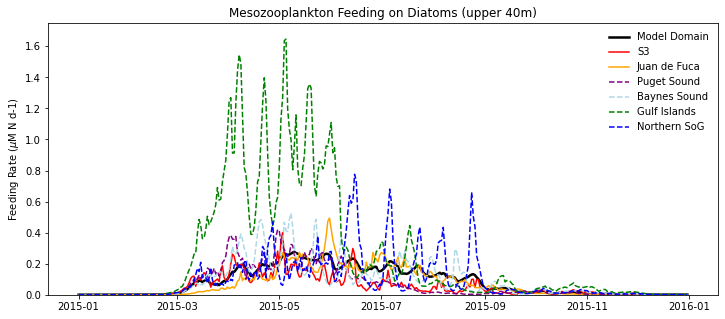

In [122]:
fig,ax=plt.subplots(1,1,figsize=(12,5))
ax.plot(tlist,(meanMESZD40*86400),'k-',label='Model Domain',linewidth=2.5)
ax.plot(tlist,(meanMESZD40S3*86400),'-',color='red',label='S3')
ax.plot(tlist,(meanMESZD40JF*86400),'-',color='orange',label='Juan de Fuca')
ax.plot(tlist,(meanMESZD40PS*86400),'--',color='purple',label='Puget Sound')
ax.plot(tlist,(meanMESZD40BS*86400),'--',color='lightblue',label='Baynes Sound')
ax.plot(tlist,(meanMESZD40GI*86400),'--',color='green',label='Gulf Islands')
ax.plot(tlist,(meanMESZD40NSoG*86400),'--',color='blue',label='Northern SoG')
ax.legend(frameon=False)
ax.set_ylim((0,1.75))
ax.set_ylabel('Feeding Rate ($\mu$M N d-1)')
ax.set_title('Mesozooplankton Feeding on Diatoms (upper 40m)')

<ipython-input-129-b2eafed5cb02>:4: RuntimeWarning: invalid value encountered in true_divide
  ax.plot(tlist,(meanMESZD40JF/meanMESZtotal40JF),'-',color='orange',label='Juan de Fuca')


Text(0.5, 1.0, 'Proportion of Mesozooplankton Feeding on Diatoms (upper 40m)')

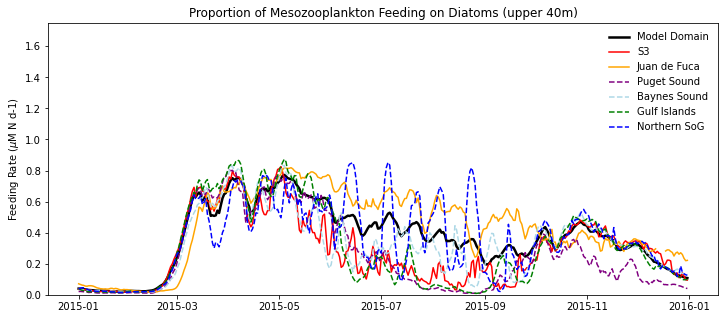

In [129]:
fig,ax=plt.subplots(1,1,figsize=(12,5))
ax.plot(tlist,(meanMESZD40/meanMESZtotal40),'k-',label='Model Domain',linewidth=2.5)
ax.plot(tlist,(meanMESZD40S3/meanMESZtotal40S3),'-',color='red',label='S3')
ax.plot(tlist,(meanMESZD40JF/meanMESZtotal40JF),'-',color='orange',label='Juan de Fuca')
ax.plot(tlist,(meanMESZD40PS/meanMESZtotal40PS),'--',color='purple',label='Puget Sound')
ax.plot(tlist,(meanMESZD40BS/meanMESZtotal40BS),'--',color='lightblue',label='Baynes Sound')
ax.plot(tlist,(meanMESZD40GI/meanMESZtotal40GI),'--',color='green',label='Gulf Islands')
ax.plot(tlist,(meanMESZD40NSoG/meanMESZtotal40NSoG),'--',color='blue',label='Northern SoG')
ax.legend(frameon=False)
ax.set_ylim((0,1.75))
ax.set_ylabel('Feeding Rate ($\mu$M N d-1)')
ax.set_title('Proportion of Mesozooplankton Feeding on Diatoms (upper 40m)')

Text(0.5, 1.0, 'Mesozooplankton Feeding on Flagellates (upper 40m)')

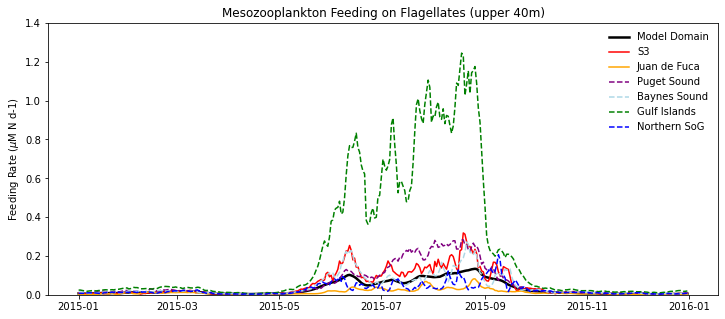

In [130]:
fig,ax=plt.subplots(1,1,figsize=(12,5))
ax.plot(tlist,(meanMESZF40*86400),'k-',label='Model Domain',linewidth=2.5)
ax.plot(tlist,(meanMESZF40S3*86400),'-',color='red',label='S3')
ax.plot(tlist,(meanMESZF40JF*86400),'-',color='orange',label='Juan de Fuca')
ax.plot(tlist,(meanMESZF40PS*86400),'--',color='purple',label='Puget Sound')
ax.plot(tlist,(meanMESZF40BS*86400),'--',color='lightblue',label='Baynes Sound')
ax.plot(tlist,(meanMESZF40GI*86400),'--',color='green',label='Gulf Islands')
ax.plot(tlist,(meanMESZF40NSoG*86400),'--',color='blue',label='Northern SoG')
ax.legend(frameon=False)
ax.set_ylim((0,1.4))
ax.set_ylabel('Feeding Rate ($\mu$M N d-1)')
ax.set_title('Mesozooplankton Feeding on Flagellates (upper 40m)')

<ipython-input-131-412acd5ccc94>:4: RuntimeWarning: invalid value encountered in true_divide
  ax.plot(tlist,(meanMESZF40JF/meanMESZtotal40JF),'-',color='orange',label='Juan de Fuca')


Text(0.5, 1.0, 'Proportion of Mesozooplankton Feeding on Flagellates (upper 40m)')

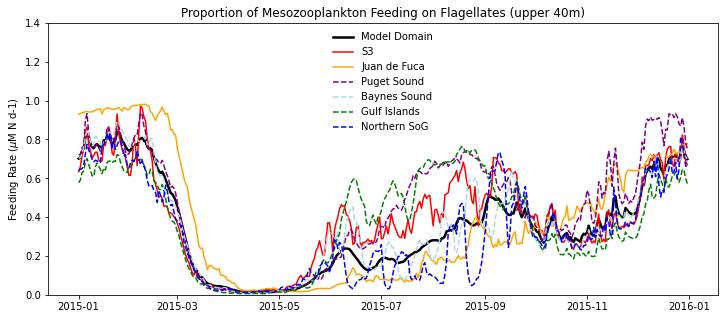

In [131]:
fig,ax=plt.subplots(1,1,figsize=(12,5))
ax.plot(tlist,(meanMESZF40/meanMESZtotal40),'k-',label='Model Domain',linewidth=2.5)
ax.plot(tlist,(meanMESZF40S3/meanMESZtotal40S3),'-',color='red',label='S3')
ax.plot(tlist,(meanMESZF40JF/meanMESZtotal40JF),'-',color='orange',label='Juan de Fuca')
ax.plot(tlist,(meanMESZF40PS/meanMESZtotal40PS),'--',color='purple',label='Puget Sound')
ax.plot(tlist,(meanMESZF40BS/meanMESZtotal40BS),'--',color='lightblue',label='Baynes Sound')
ax.plot(tlist,(meanMESZF40GI/meanMESZtotal40GI),'--',color='green',label='Gulf Islands')
ax.plot(tlist,(meanMESZF40NSoG/meanMESZtotal40NSoG),'--',color='blue',label='Northern SoG')
ax.legend(frameon=False)
ax.set_ylim((0,1.4))
ax.set_ylabel('Feeding Rate ($\mu$M N d-1)')
ax.set_title('Proportion of Mesozooplankton Feeding on Flagellates (upper 40m)')

Text(0.5, 1.0, 'Mesozooplankton Feeding on Ciliates (upper 40m)')

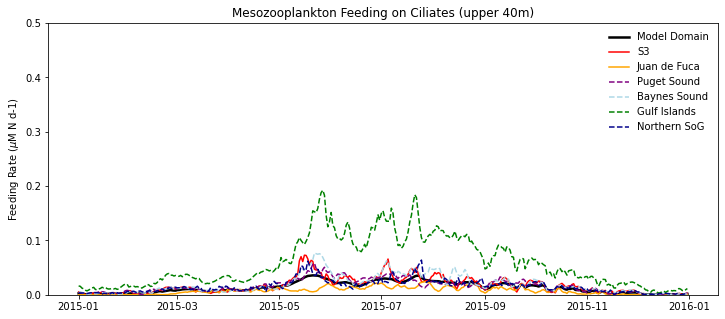

In [108]:
fig,ax=plt.subplots(1,1,figsize=(12,5))
ax.plot(tlist,(meanMESZC40*86400),'k-',label='Model Domain',linewidth=2.5)
ax.plot(tlist,(meanMESZC40S3*86400),'-',color='red',label='S3')
ax.plot(tlist,(meanMESZC40JF*86400),'-',color='orange',label='Juan de Fuca')
ax.plot(tlist,(meanMESZC40PS*86400),'--',color='purple',label='Puget Sound')
ax.plot(tlist,(meanMESZC40BS*86400),'--',color='lightblue',label='Baynes Sound')
ax.plot(tlist,(meanMESZC40GI*86400),'--',color='green',label='Gulf Islands')
ax.plot(tlist,(meanMESZC40NSoG*86400),'--',color='darkblue',label='Northern SoG')
ax.legend(frameon=False)
ax.set_ylim((0,.5))
ax.set_ylabel('Feeding Rate ($\mu$M N d-1)')
ax.set_title('Mesozooplankton Feeding on Ciliates (upper 40m)')

Text(0.5, 1.0, 'Mesozooplankton Feeding on Microzooplankton (upper 40m)')

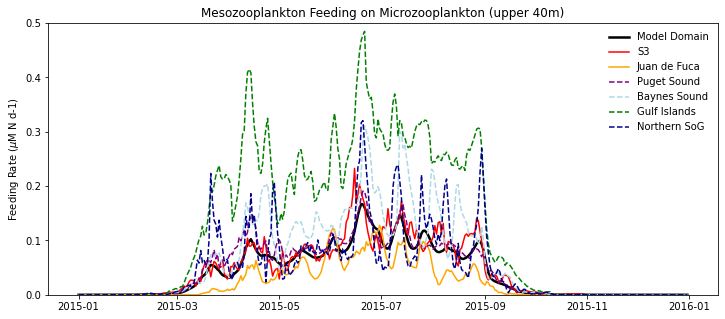

In [109]:
fig,ax=plt.subplots(1,1,figsize=(12,5))
ax.plot(tlist,(meanMESZM40*86400),'k-',label='Model Domain',linewidth=2.5)
ax.plot(tlist,(meanMESZM40S3*86400),'-',color='red',label='S3')
ax.plot(tlist,(meanMESZM40JF*86400),'-',color='orange',label='Juan de Fuca')
ax.plot(tlist,(meanMESZM40PS*86400),'--',color='purple',label='Puget Sound')
ax.plot(tlist,(meanMESZM40BS*86400),'--',color='lightblue',label='Baynes Sound')
ax.plot(tlist,(meanMESZM40GI*86400),'--',color='green',label='Gulf Islands')
ax.plot(tlist,(meanMESZM40NSoG*86400),'--',color='darkblue',label='Northern SoG')
ax.legend(frameon=False)
ax.set_ylim((0,.5))
ax.set_ylabel('Feeding Rate ($\mu$M N d-1)')
ax.set_title('Mesozooplankton Feeding on Microzooplankton (upper 40m)')